# Mettre une équation sur des données



Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_fit_equation.ipynb"> ça se passe ici<a>

    
Une manière de déterminer une fonction représentant des données est de trouver les coefficients d'un polynome qui minimisent l'écart au sens des moindres carrés entre les données et la fonction  (<a href="https://fr.wikipedia.org/wiki/M%C3%A9thode_des_moindres_carr%C3%A9s">un rappel<a>).
        
## Application 

Prenons l'exemple de la constante de dissociation du monoxyde d'azote $K_{NO}$ en fonction de la température.

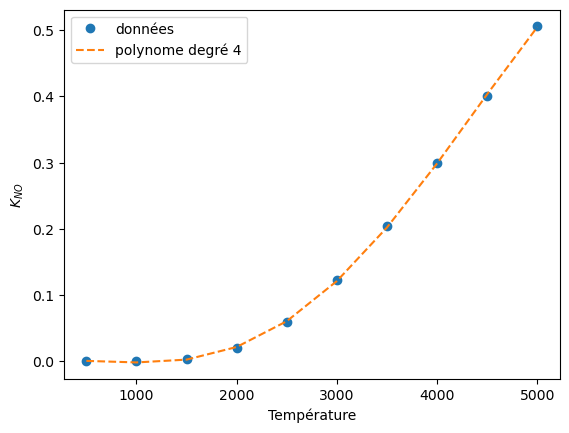

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Réaction N2+O2 <-> 2NO : les données disponibles
T = np.arange(500,5500,500)
K = np.array([2*1e-9,9*1e-5,0.0033,0.02,0.0593,0.1222,0.2042,0.2992,0.4009,0.5058])

# on va essayer de trouver un polynôme de degré 4 pour approximer les données
n = 4
coeffs = np.polyfit(T, K, n) # le résultat est donné sous la forme des 4+1 coefficients (a*x**0 + b*x**1 + ... + e*x**4) )

# ensuite on utilise poly1d de numpy pour pouvoir utiliser directement le résultat
fc_polynome = np.poly1d(coeffs)

# on trace pour voir
plt.plot(T,K,'o', label='données')
plt.plot(T, fc_polynome(T),'--', label='polynome degré ' + str(n) )
plt.xlabel("Température")
plt.ylabel(r"$K_{NO}$")
plt.legend()

On peut utiliser l'option `full=True` dans l'appel de `polyfit` pour obtenir l'écart entre le polynome obtenu et les données : 

`coeffs, residuals, rank, singular_values, rcond =  np.polyfit(T, K, 4, full=True)`

<span style="color:green"> *À vous de jouer : faites un boucle pour savoir quel degré de polynôme donne la meilleure fonction pour approcher les données (çàd avec le résidu le plus faible).* </span>

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Réaction N2+O2 <-> 2NO : les données disponibles
T = np.arange(500,5500,500)
K = np.array([2*1e-9,9*1e-5,0.0033,0.02,0.0593,0.1222,0.2042,0.2992,0.4009,0.5058])

for n in range(1,8):
    print("essai degré ", n)
    # a vous...